<a href="https://colab.research.google.com/github/tech-dhawal-03/Data-Mining-Projects/blob/main/Opinion_Mining_for_Social_Networking_Site.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
# Load dataset with no header
# Load the uploaded CSV file
df = pd.read_csv("/content/sample_data/twitter_training.csv", header=None, names=['ID', 'Topic', 'Sentiment', 'Text'])
# Display the first few rows
df.head()

# Basic info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53827 entries, 0 to 53826
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         53827 non-null  int64 
 1   Topic      53827 non-null  object
 2   Sentiment  53827 non-null  object
 3   Text       53335 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.6+ MB


In [6]:
# Drop missing values
df.dropna(subset=['Text', 'Sentiment'], inplace=True)
df.head()

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [7]:
# Optional: filter only common sentiments
df = df[df['Sentiment'].isin(['Positive', 'Negative', 'Neutral'])]

In [8]:
# Preprocess text
df['Text'] = df['Text'].str.lower().str.replace('[^\w\s]', '', regex=True)

In [9]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Sentiment'], test_size=0.2, random_state=42)


In [10]:
# Vectorize text
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [11]:
# Train Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)
nb_preds = nb_model.predict(X_test_vec)

In [12]:

# Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_vec, y_train)
lr_preds = lr_model.predict(X_test_vec)

In [13]:
# Print reports
print("Naive Bayes Report:\n", classification_report(y_test, nb_preds))
print("Logistic Regression Report:\n", classification_report(y_test, lr_preds))

Naive Bayes Report:
               precision    recall  f1-score   support

    Negative       0.76      0.77      0.76      3032
     Neutral       0.78      0.56      0.65      2487
    Positive       0.69      0.83      0.75      3177

    accuracy                           0.73      8696
   macro avg       0.74      0.72      0.72      8696
weighted avg       0.74      0.73      0.73      8696

Logistic Regression Report:
               precision    recall  f1-score   support

    Negative       0.81      0.80      0.81      3032
     Neutral       0.71      0.72      0.72      2487
    Positive       0.79      0.79      0.79      3177

    accuracy                           0.77      8696
   macro avg       0.77      0.77      0.77      8696
weighted avg       0.77      0.77      0.77      8696



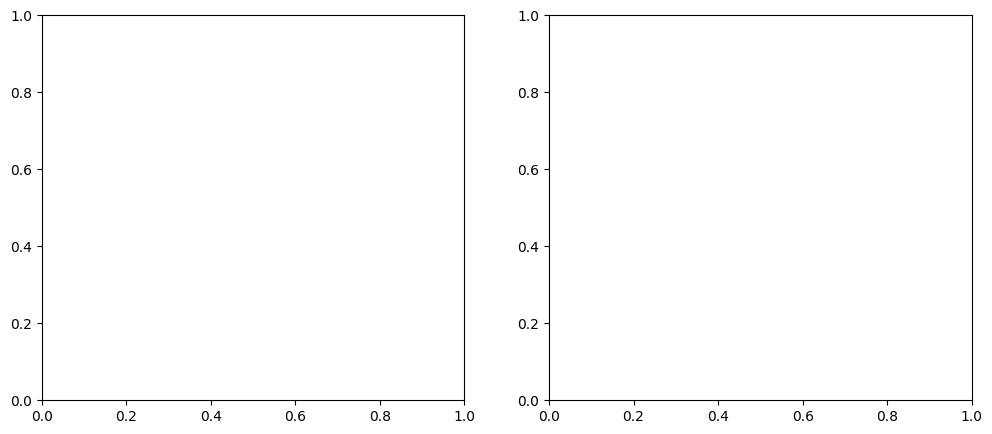

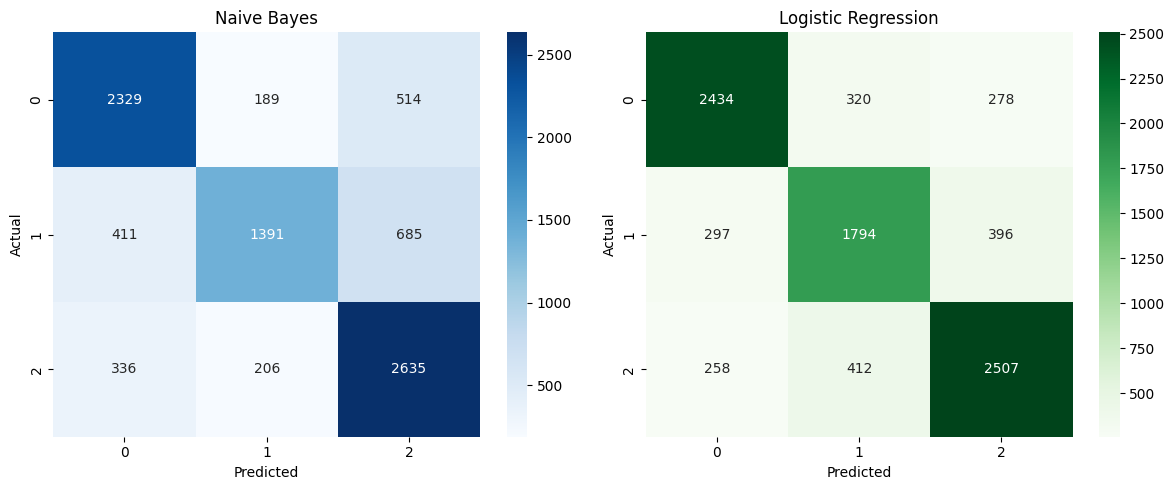

In [24]:
# Confusion matrix plots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, nb_preds), annot=True, fmt='d', ax=axs[0], cmap='Blues')
axs[0].set_title('Naive Bayes')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, lr_preds), annot=True, fmt='d', ax=axs[1], cmap='Greens')
axs[1].set_title('Logistic Regression')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()